# Homework 6 (Tymoteusz Makowski)
### Tasks description
1. For the selected data set, train at least one tree-based ensemble model (random forest, gbm, catboost or any other boosting)
1. for selected variables from the model (1) calculate Partial Dependence Profiles and Accumulated Local Dependence
1. train a second model with a different structure (neural nets, linear, other boosting) and find a variable that has different behaviour between models
1. Comment on the results for points (2) and (3)

## Ad Task 2

The selected data is an artificial data set from `DALEX` package containing various features about dragons and a `life_length` target variable. The model of choices was random forest implemented in R's `randomForest` package. I have decided to not use any hyperparameters of the model.

### Partial Dependence Profiles

For creating plots in this section I have decided to select two variables which seemed to yield most interesting results during the modelling part of the homework. Those are `year_of_birth` and `height`.

Starting with average PD profile for both of the abovementioned variables we see two plots which greatly differ between the variables. The left plot (`year_of_birth`) clearly show that dragons born between $500$ and $1500$ have lower, although by not much, expected `life_length`. The edges of this plot appear to be skewed towards the mean response which is known for Random Forest models.

The right plot for the `height` variable shows that on average the dragons height doe not affect it's `life_length` much unless the `height` is high. There is clear rise by approx $3.77\%$ of `life_lenght` between dragons with `height` between $63$ and $70$.

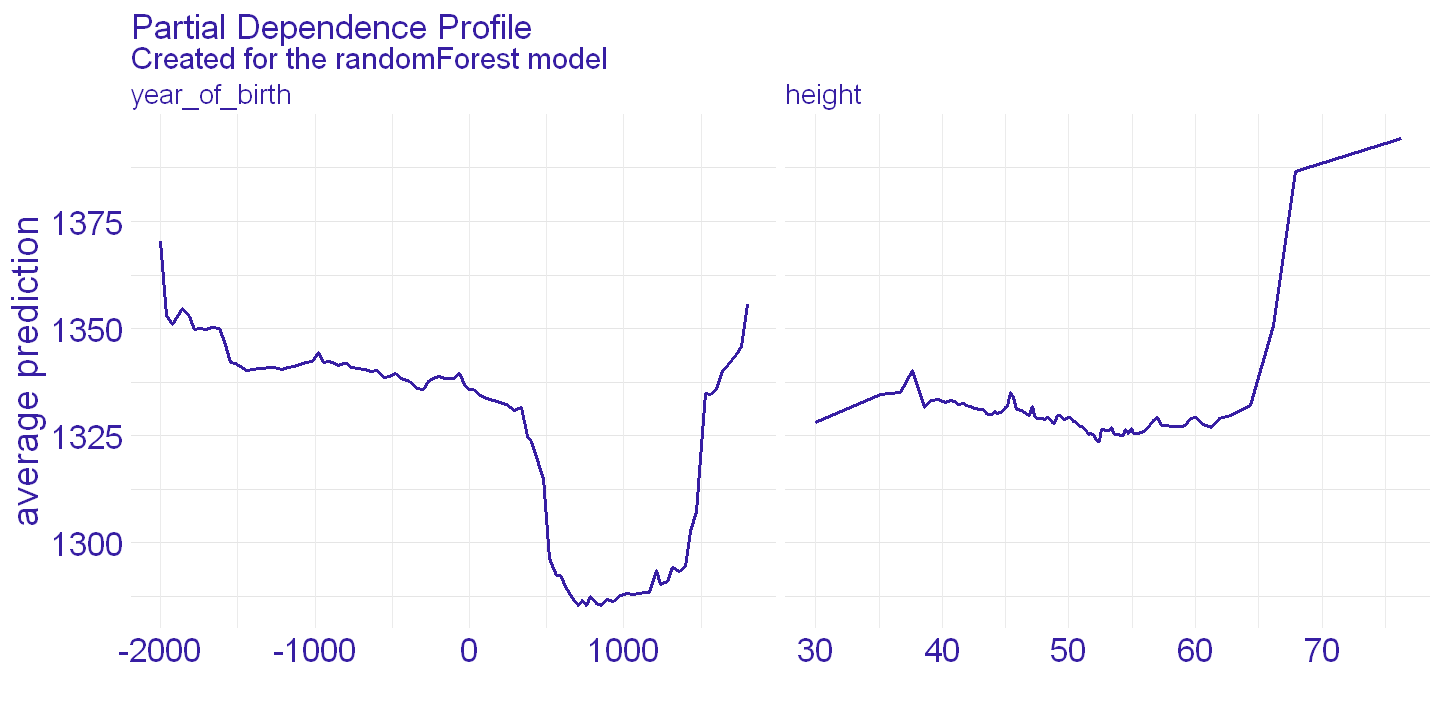

In [20]:
options(repr.plot.width = 12, repr.plot.height = 6)
task2_p1

Adding the CP profiles to the averaged PD profile shows that the tendency for both of the variables appears to be kept across the dataset.

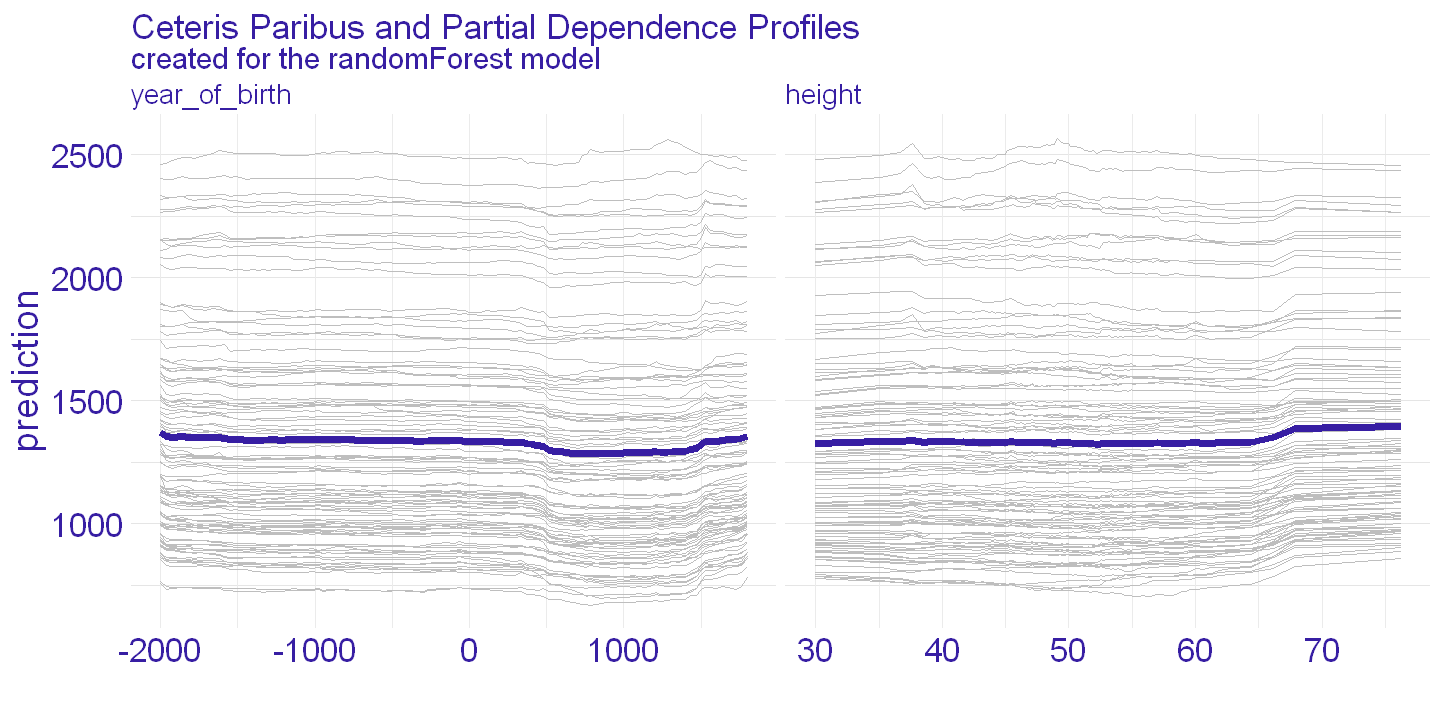

In [21]:
options(repr.plot.width = 12, repr.plot.height = 6)
task2_p2

The clustered partial dependence profiles have a cluster which appears to have caught outliers of the dataset with very high `life_length` -- this cluster is marked with blue line. The other two clusters have similar shape and are either overlapping or very close to each other. This can lead to conclusion that the observations across the dataset are generally similar to each other, apart from the few outliers, when it comes to the `year_of_birth` and `height` impact on the `life_length`.

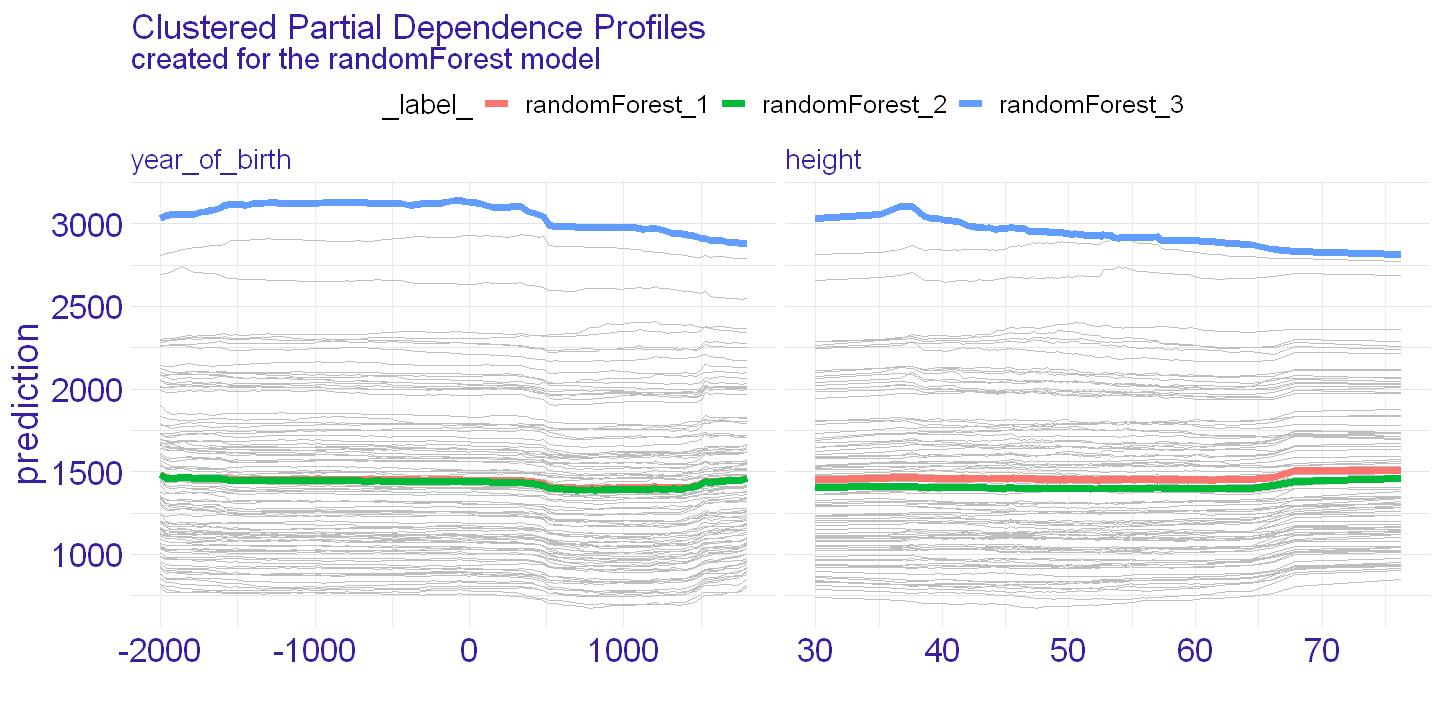

In [22]:
options(repr.plot.width = 12, repr.plot.height = 6)
task2_p3

The final analysis with the PD profiles I have performed included using grouped partial dependence profiles. I have decided that grouping the dragons by their color is quite natural grouping (as far as "natural" goes when it comes to *dragons*).

The results are shown on the plots below. We can clearly see that the shapes of grouped profiles are similar to each other with small variations in the black dragons (red line) -- around `year_of_birth = 450` and `height = 60`. These plots give us information how `life_length` of dragons differs based on their colors. Clearly, the black dragons have much lower average `life_length` than other colors whereas the green dragons have slightly higher `life_lenght` than both blue and red dragons.

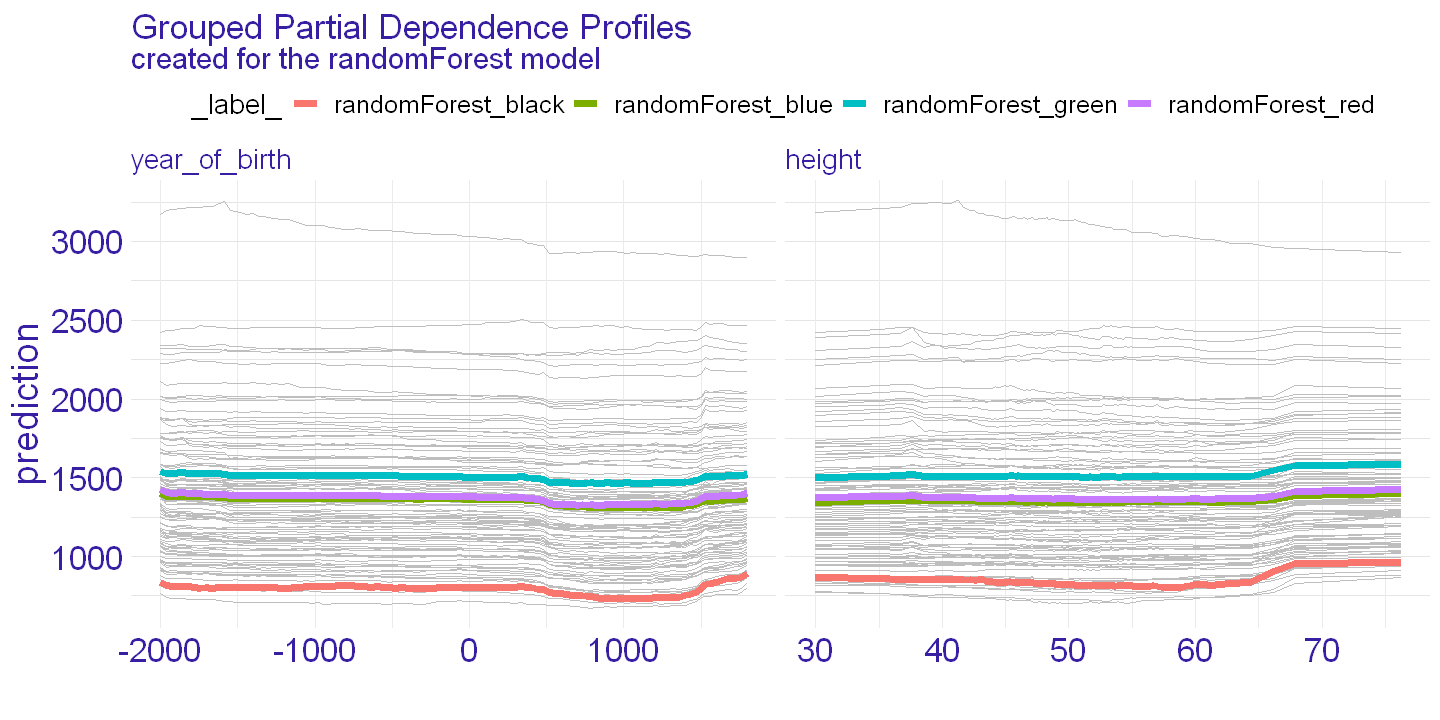

In [23]:
options(repr.plot.width = 12, repr.plot.height = 6)
task2_p4

### Accumulated Local Dependence

The below plots show AL and PD plots for every variable side by side.

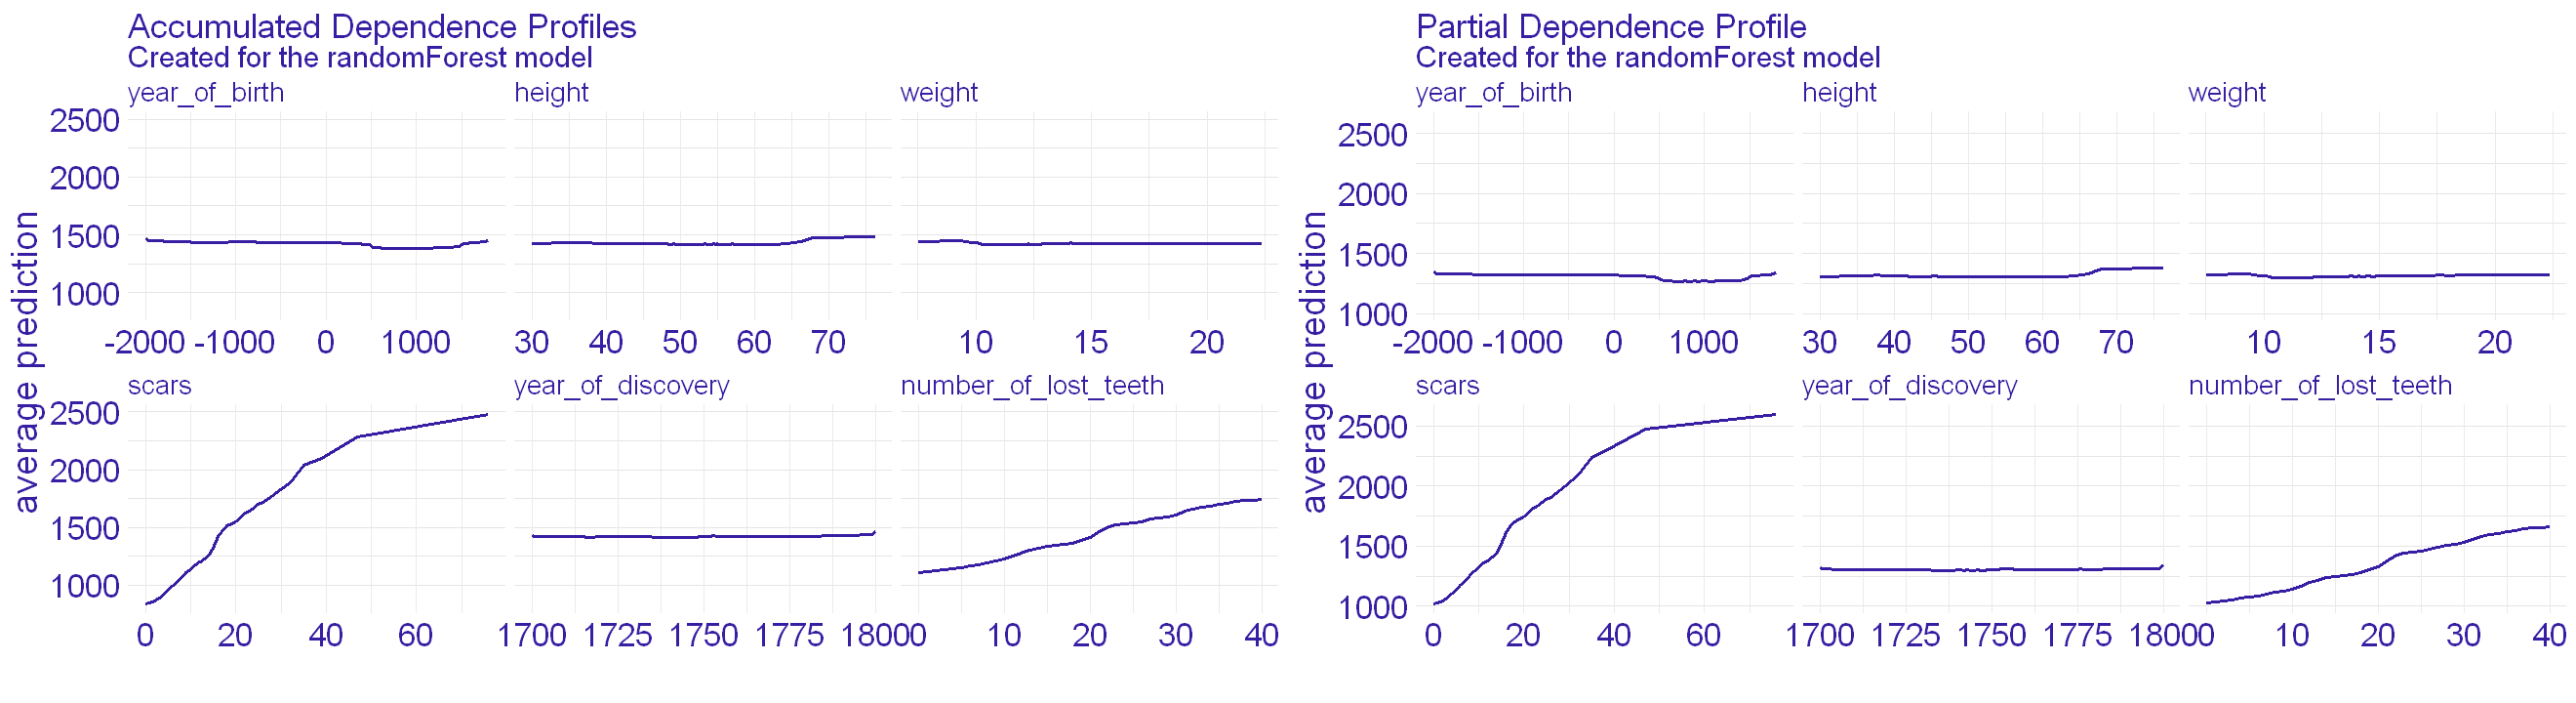

In [24]:
options(repr.plot.width = 22, repr.plot.height = 6)

grid.arrange(task2_p5, task2_p6, ncol = 2)

The thing that stands out to me is... that nothing stands out. This means that accumulated profiles do not differ from partial profiles too much which in turn can indicate that there are no correlations between the variables. I suspect that this is due to the fact that the dataset is artifically generated (according to documentation) and that there is not much domain knowledge about *dragons* which could have been used during creation of the data to create some correlations between the variables.

## Ad Task 3

The second model with different structure I have chosen is linear model. The variable I managed to find with a different behaviour is `height`. For the random forest model, as shown on the bottom of each panel of the plot below, the `height` variable on average works towards a higher prediction of the `life_length` target variable. However, the linear model shows exactly the opposite correlation - the higher `height` the lower predicted `life_length`.

Although on the central panel the slope is small for the linear model, it is constant across the CP profiles. The random forest's profiles show tendency to slightly rise throught the central plot. An additional confirmation of the difference between the two models is custered partial dependence profile showing that subsets of the data retain the tendency presented globally.

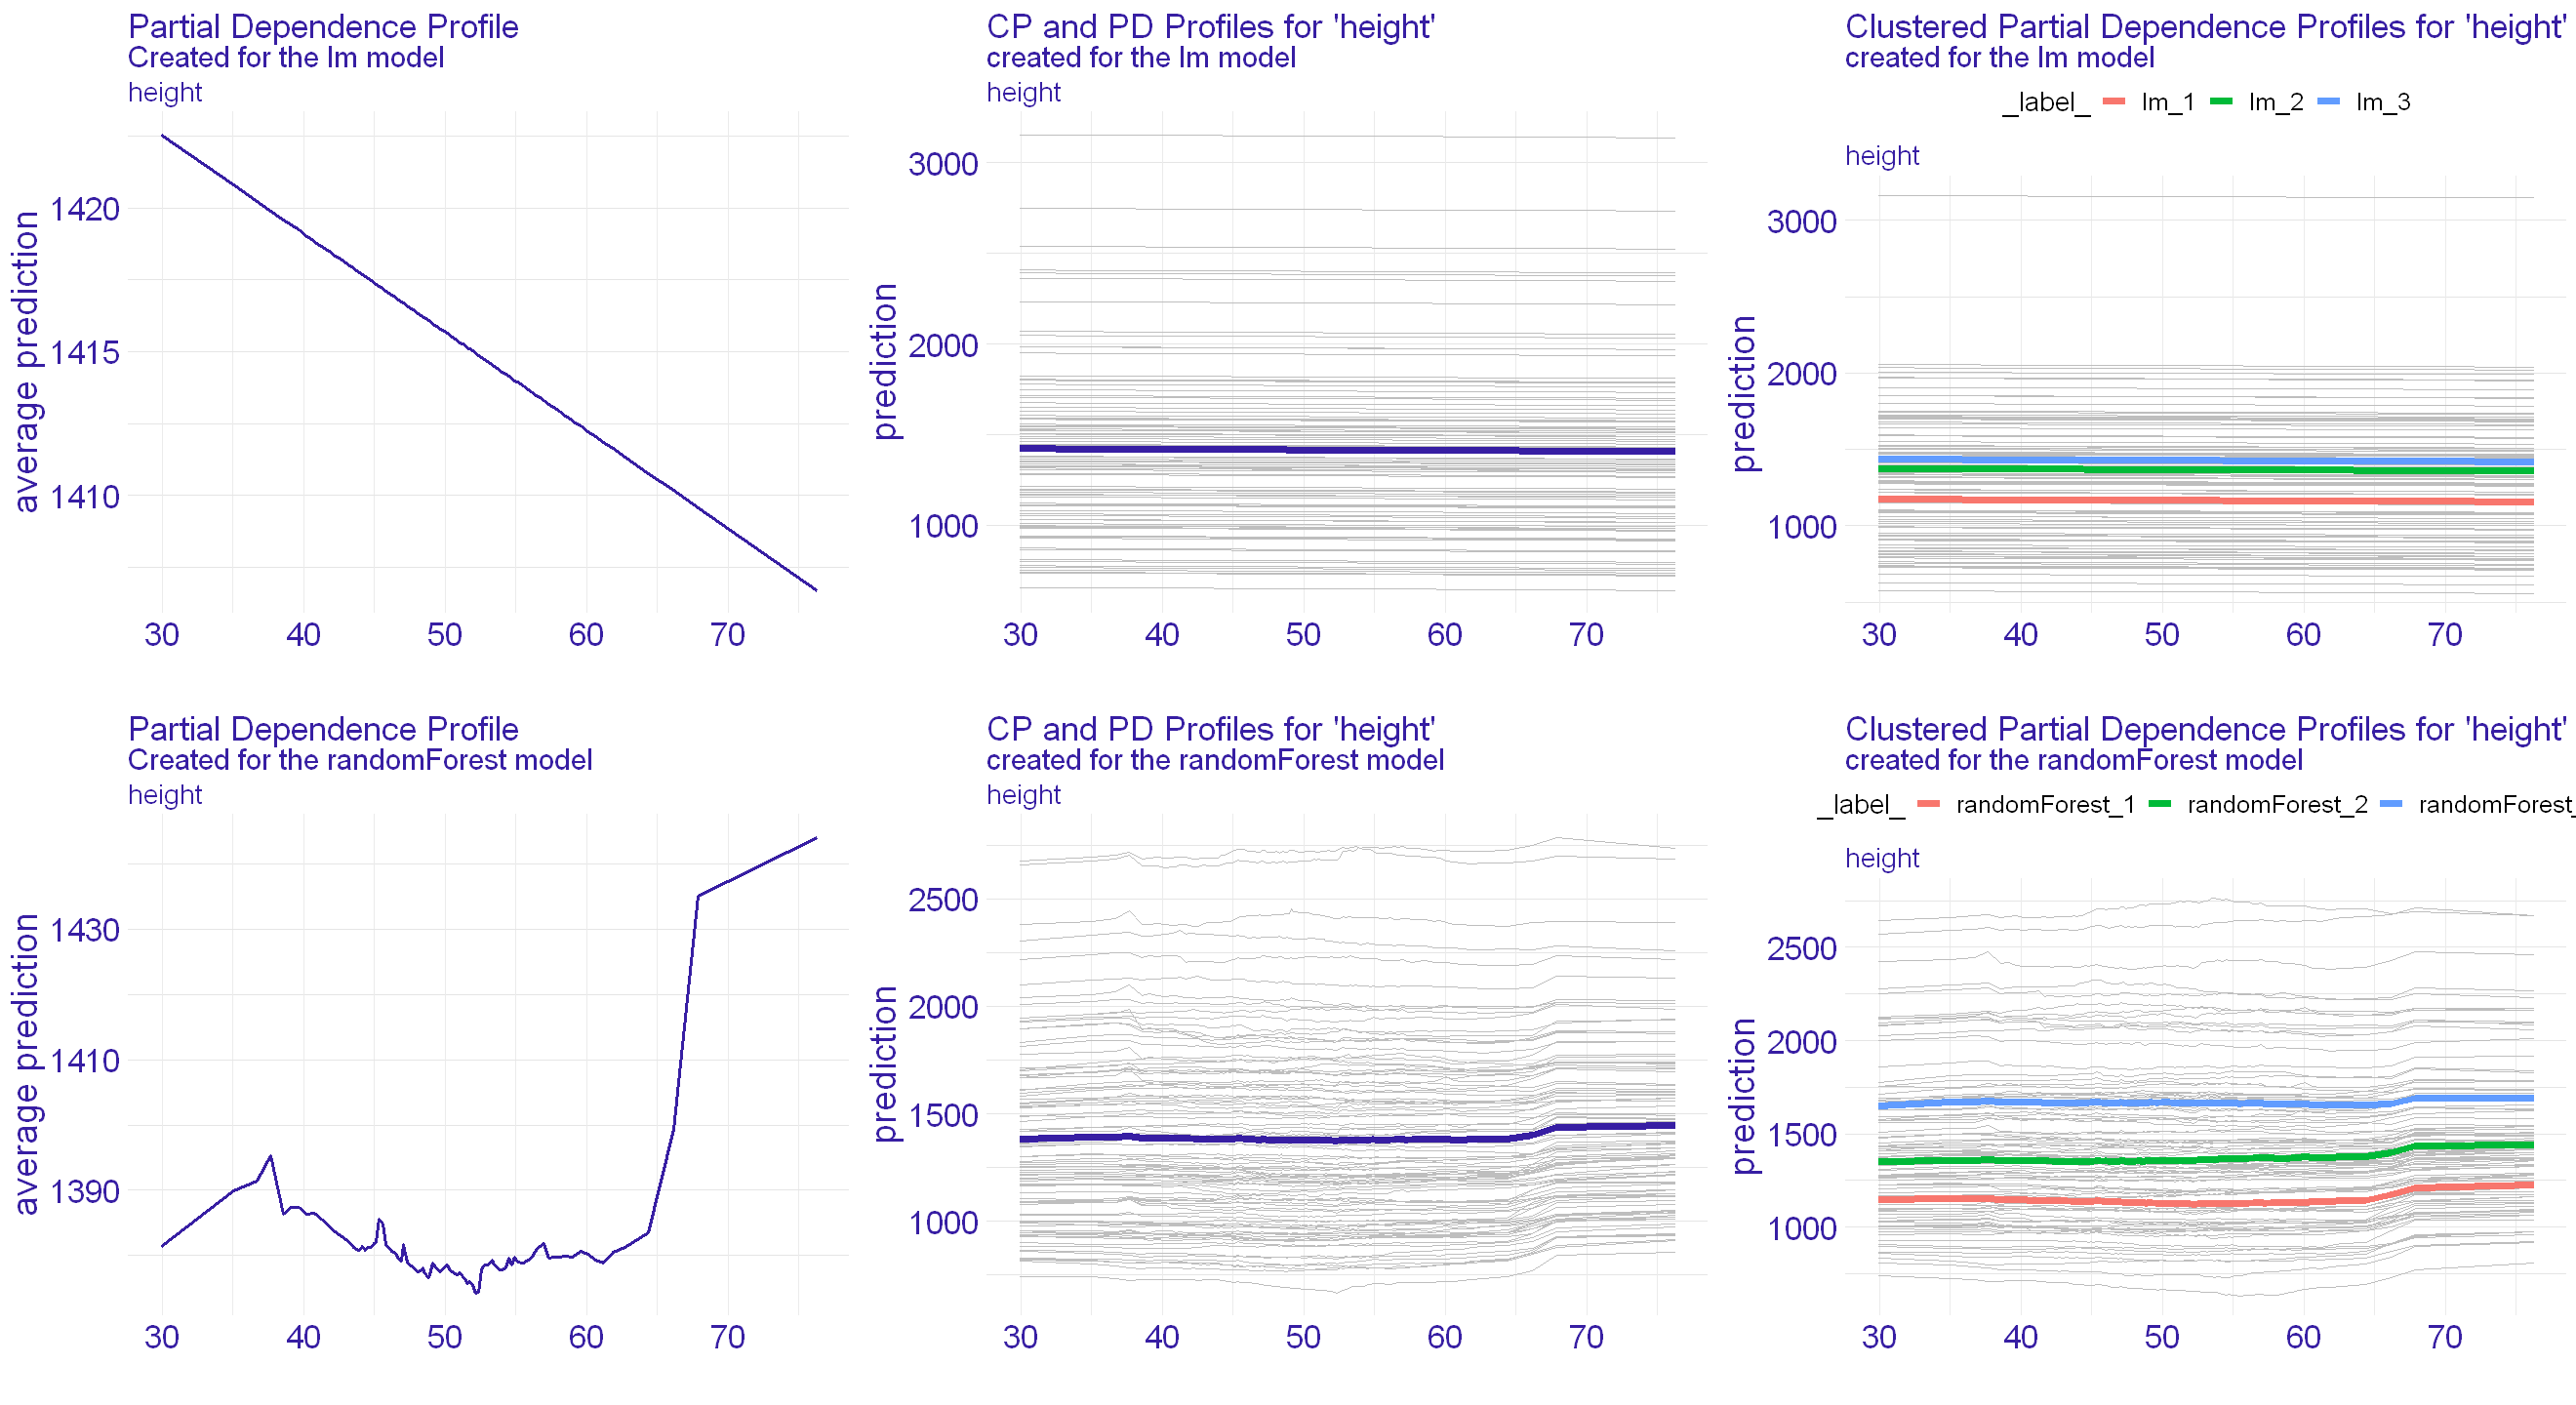

In [25]:
options(repr.plot.width = 22, repr.plot.height = 12)
grid.arrange(task3_lm_p1, task3_lm_p2 + ggtitle("CP and PD Profiles for 'height'"), task3_lm_p3,
             task3_rf_p1, task3_rf_p2 + ggtitle("CP and PD Profiles for 'height'"), task3_rf_p3, ncol = 3)

## Appendix

In [1]:
options(jupyter.rich_display = FALSE, width = 120)


library("randomForest")
library("DALEX")
library("ggplot2")
library("gridExtra")


increase_plot_font_size <- function(g, font_size = 20) {
    g + theme(
        axis.text = element_text(size = font_size),
        axis.title = element_text(size = font_size + 3),
        strip.text = element_text(size = font_size - 3, margin = margin(0, 0, 5, 0)),
        plot.subtitle = element_text(size = font_size - 2, margin = margin(-10, 0, 15, 0)),
        plot.title = element_text(size = font_size + 1),
        legend.title = element_text(size = font_size - 3),
        legend.text = element_text(size = font_size - 5)
    )
}


print_loss <- function(model, X, y) {
    rms <- loss_root_mean_square(
        y,
        predict(model, X)
    )
    cat(
        sprintf(
            "RMSE: %s\nMean: %s\nRelative RMSE: %s%%",
            round(rms, 2),
            round(mean(y), 2),
            round(rms / mean(y) * 100, 2)
        )
    )
}

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Welcome to DALEX (version: 1.2.0).
Find examples and detailed introduction at: https://pbiecek.github.io/ema/



Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin



Attaching package: 'gridExtra'


The following object is masked from 'package:randomForest':

    combine




### Task 1

In [2]:
data <- dragons
data_test <- dragons_test

y_idx <- 8
X_train <- data[, -y_idx]
y_train <- data[, y_idx]

X_test <- data_test[, -y_idx]
y_test <- data_test[, y_idx]

explained_vars <- c("year_of_birth", "height")

In [3]:
head(data)

  year_of_birth height   weight   scars colour year_of_discovery number_of_lost_teeth life_length
1 -1291         59.40365 15.32391 7     red    1700              25                   1368.4331  
2  1589         46.21374 11.80819 5     red    1700              28                   1377.0474  
3  1528         49.17233 13.34482 6     red    1700              38                   1603.9632  
4  1645         48.29177 13.27427 5     green  1700              33                   1434.4222  
5    -8         49.99679 13.08757 1     red    1700              18                    985.4905  
6   915         45.40876 11.48717 2     red    1700              20                    969.5682  

In [4]:
rf_model <- randomForest(x = X_train, y = y_train)
rf_model


Call:
 randomForest(x = X_train, y = y_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 10967.34
                    % Var explained: 95.01

In [5]:
print_loss(rf_model, X_test, y_test)

RMSE: 189.89
Mean: 1436.14
Relative RMSE: 13.22%

### Task 2

In [6]:
rf_explainer <- explain(rf_model, data = X_train, y = y_train)

Preparation of a new explainer is initiated
  -> model label       :  randomForest  (  default  )
  -> data              :  2000  rows  7  cols 
  -> target variable   :  2000  values 
  -> model_info        :  package randomForest , ver. 4.6.14 , task regression (  default  ) 
  -> predict function  :  yhat.randomForest  will be used (  default  )
  -> predicted values  :  numerical, min =  625.3495 , mean =  1370.227 , max =  3272.632  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -117.6051 , mean =  0.7585316 , max =  746.6214  
  A new explainer has been created!  


#### Partial Dependence Profiles

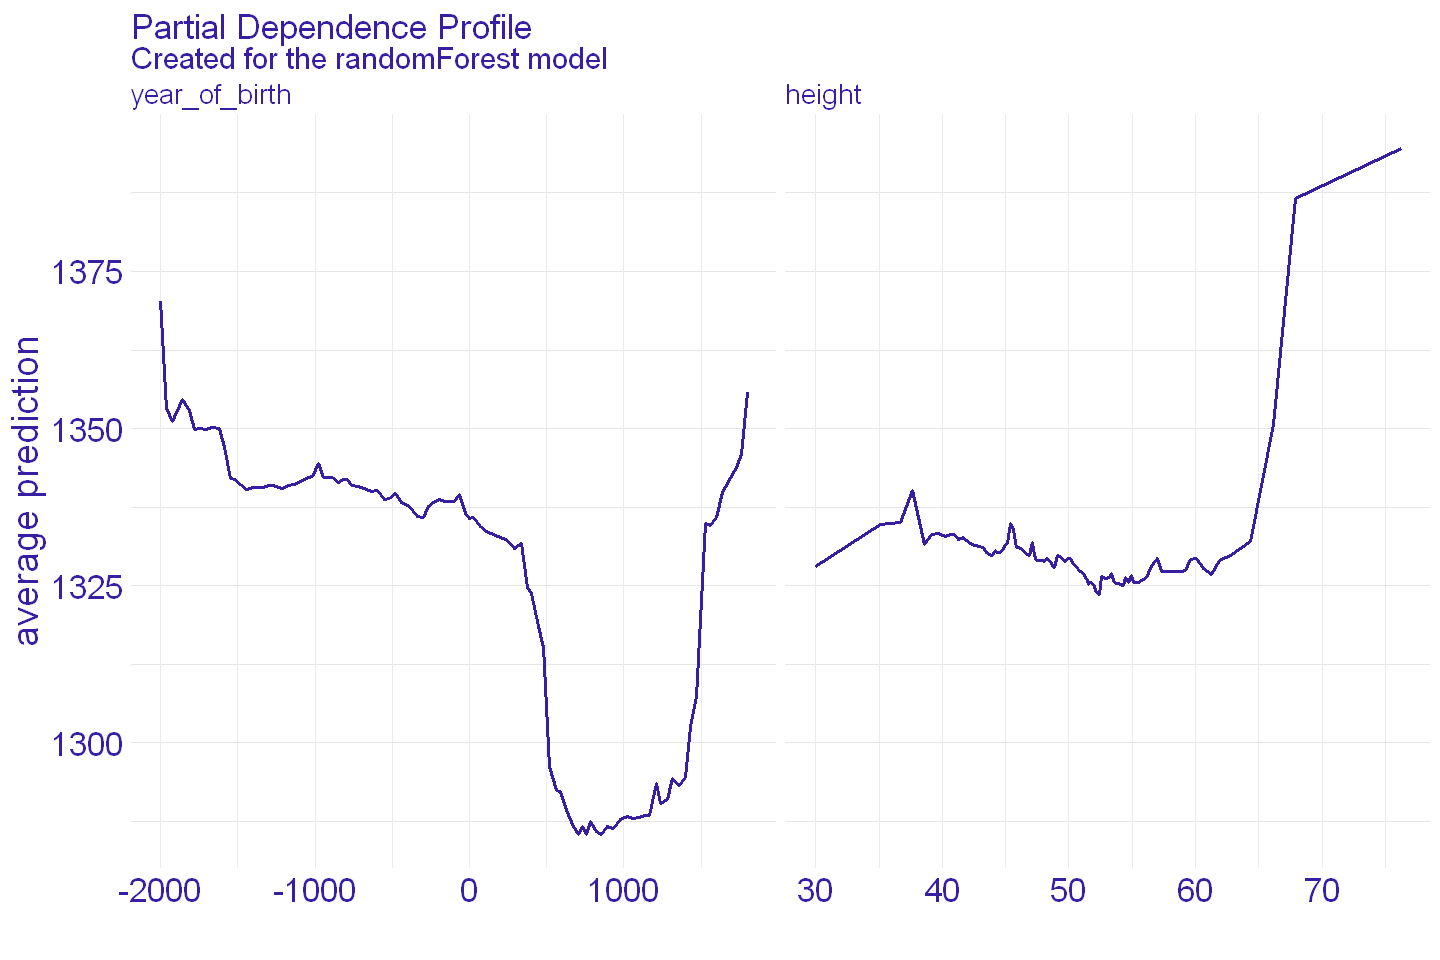

In [7]:
rf_pdp <- model_profile(rf_explainer, explained_vars)
task2_p1 <- increase_plot_font_size(plot(rf_pdp)) +
    ggtitle("Partial Dependence Profile")

options(repr.plot.width = 12, repr.plot.height = 8)
task2_p1

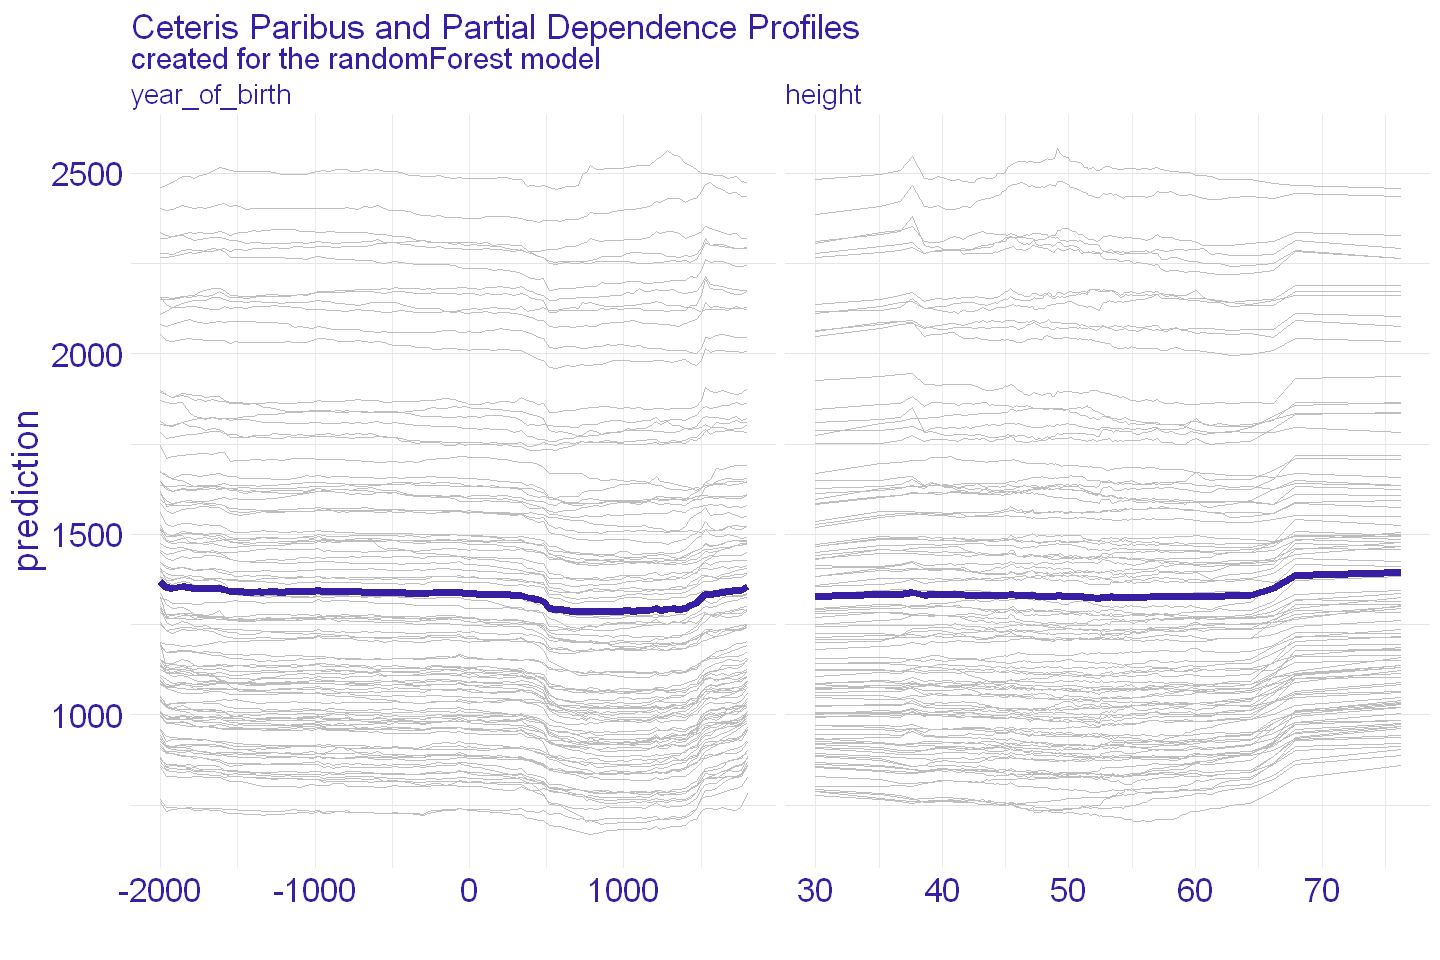

In [8]:
task2_p2 <- increase_plot_font_size(plot(rf_pdp, geom = "profiles")) +
    theme(plot.subtitle = element_text(margin = margin(0, 0, 5, 0))) +
    ggtitle("Ceteris Paribus and Partial Dependence Profiles")

options(repr.plot.width = 12, repr.plot.height = 8)
task2_p2

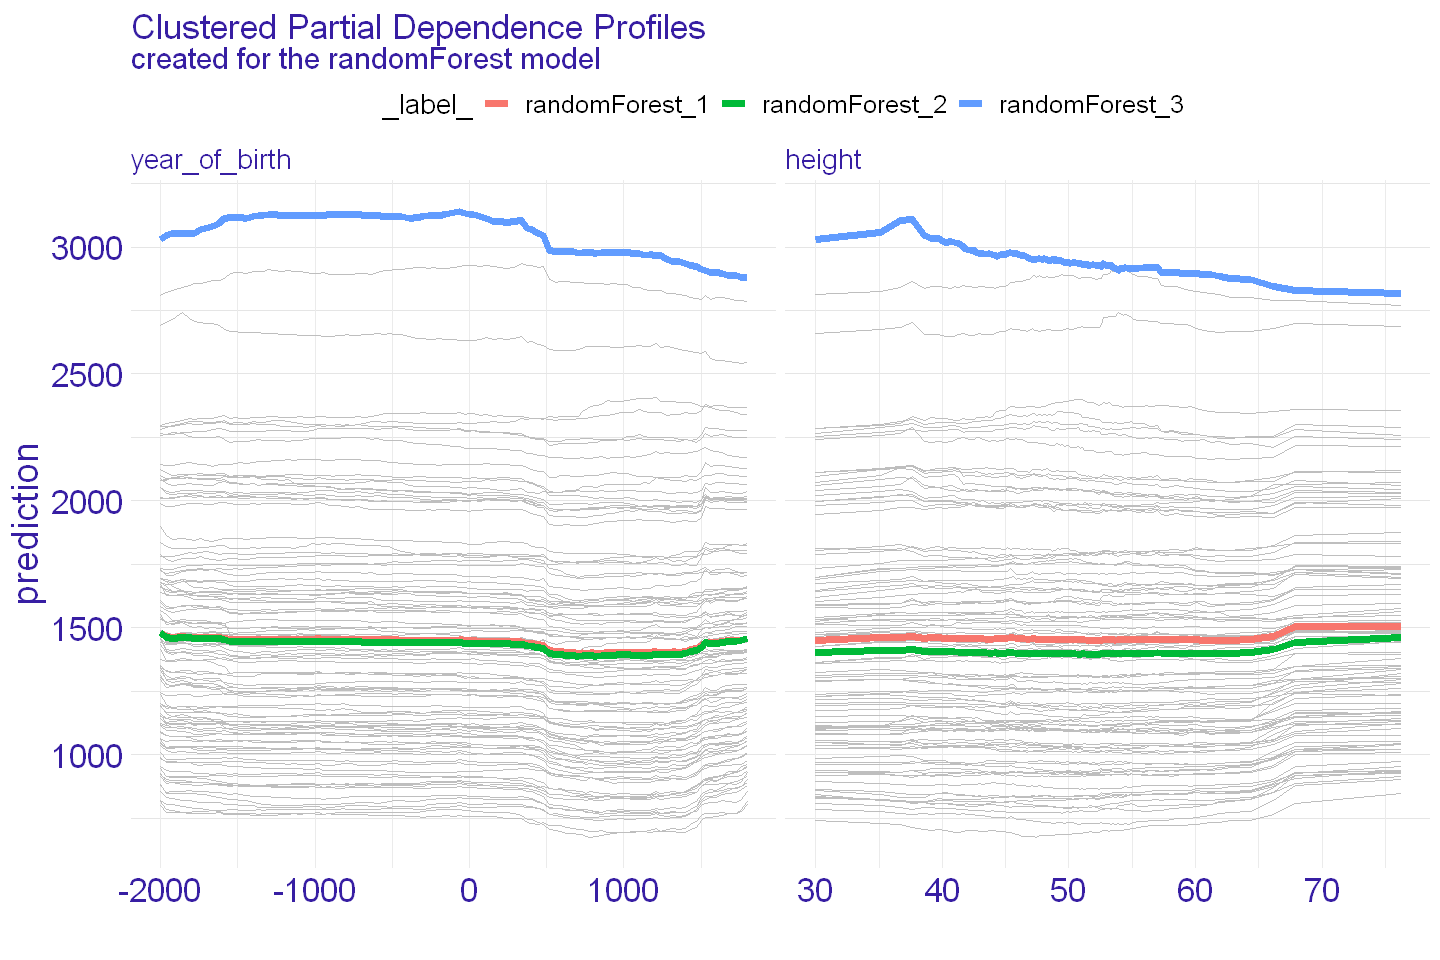

In [9]:
task2_p3 <- increase_plot_font_size(
    plot(
        model_profile(rf_explainer, explained_vars, k = 3),
        geom="profiles"
    )
) +
    theme(plot.subtitle = element_text(margin = margin(0, 0, 5, 0))) +
    ggtitle("Clustered Partial Dependence Profiles")


options(repr.plot.width = 12, repr.plot.height = 8)
task2_p3

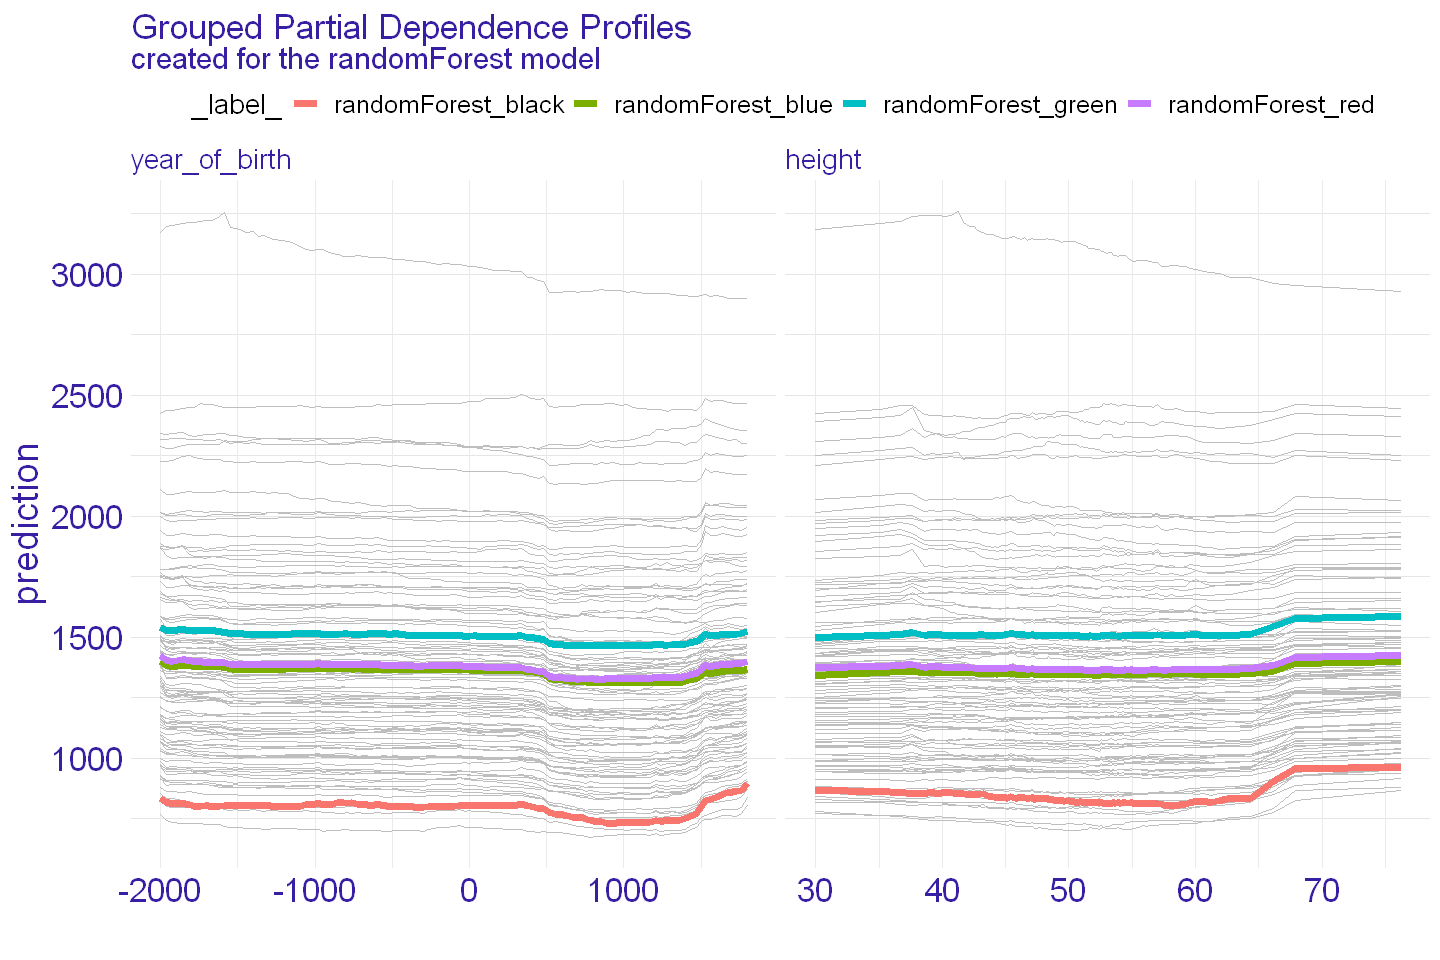

In [10]:
task2_p4 <- increase_plot_font_size(
    plot(
        model_profile(rf_explainer, explained_vars, groups = "colour"),
        geom = "profiles"
    )
) +
    theme(plot.subtitle = element_text(margin = margin(0, 0, 5, 0))) +
    ggtitle("Grouped Partial Dependence Profiles")

options(repr.plot.width = 12, repr.plot.height = 8)
task2_p4

#### Accumulated Local Dependence

In [11]:
rf_vp <- variable_profile(rf_explainer, type = "accumulated") 

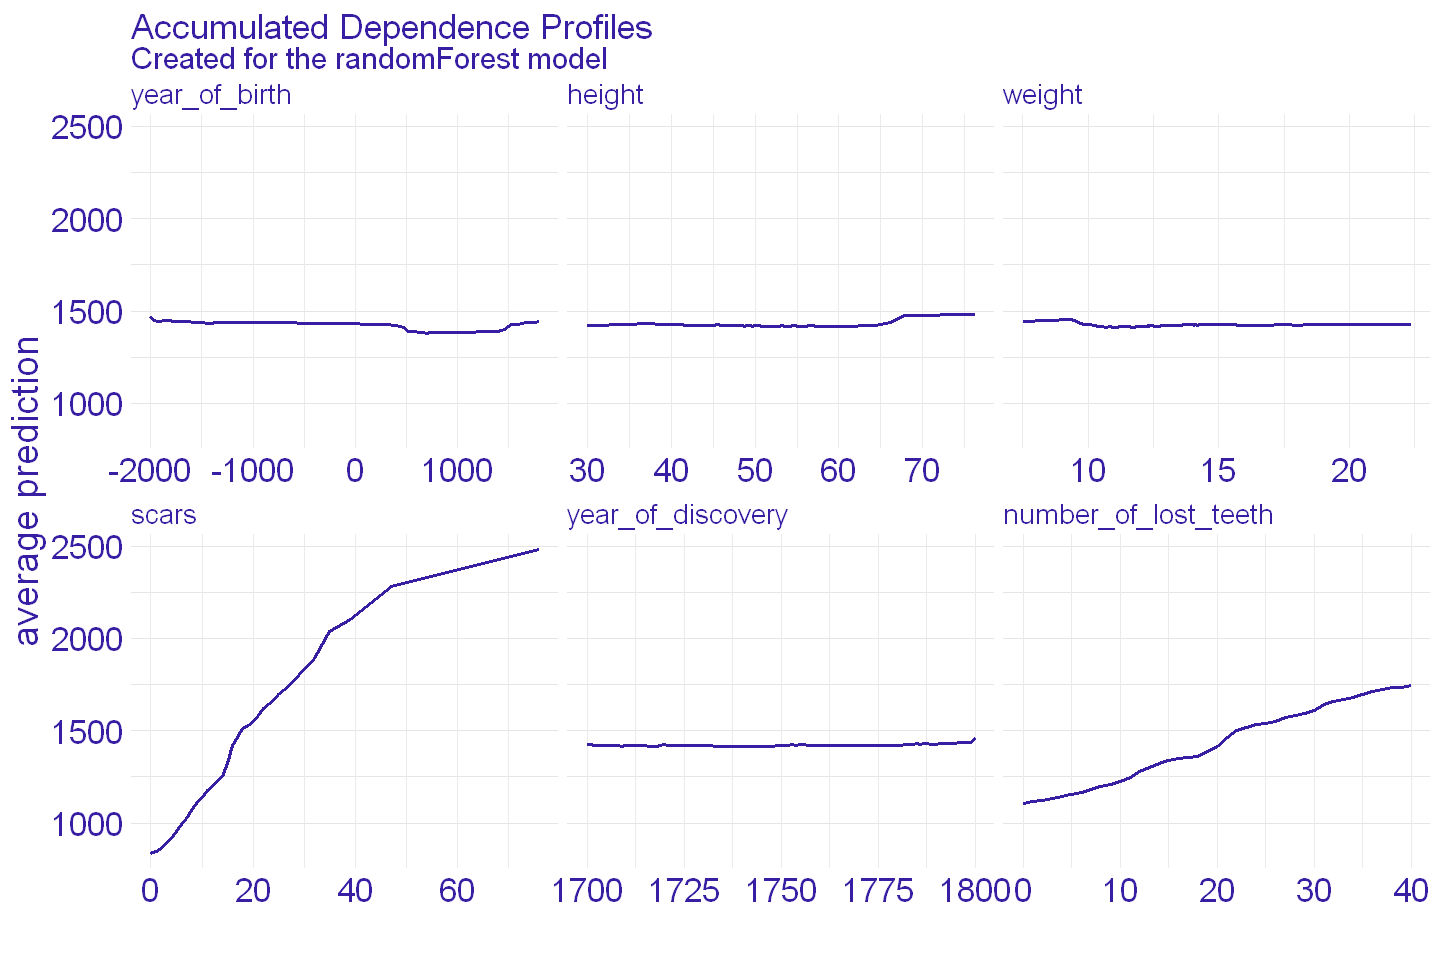

In [12]:
task2_p5 <- increase_plot_font_size(plot(rf_vp)) + ggtitle("Accumulated Dependence Profiles")
task2_p5

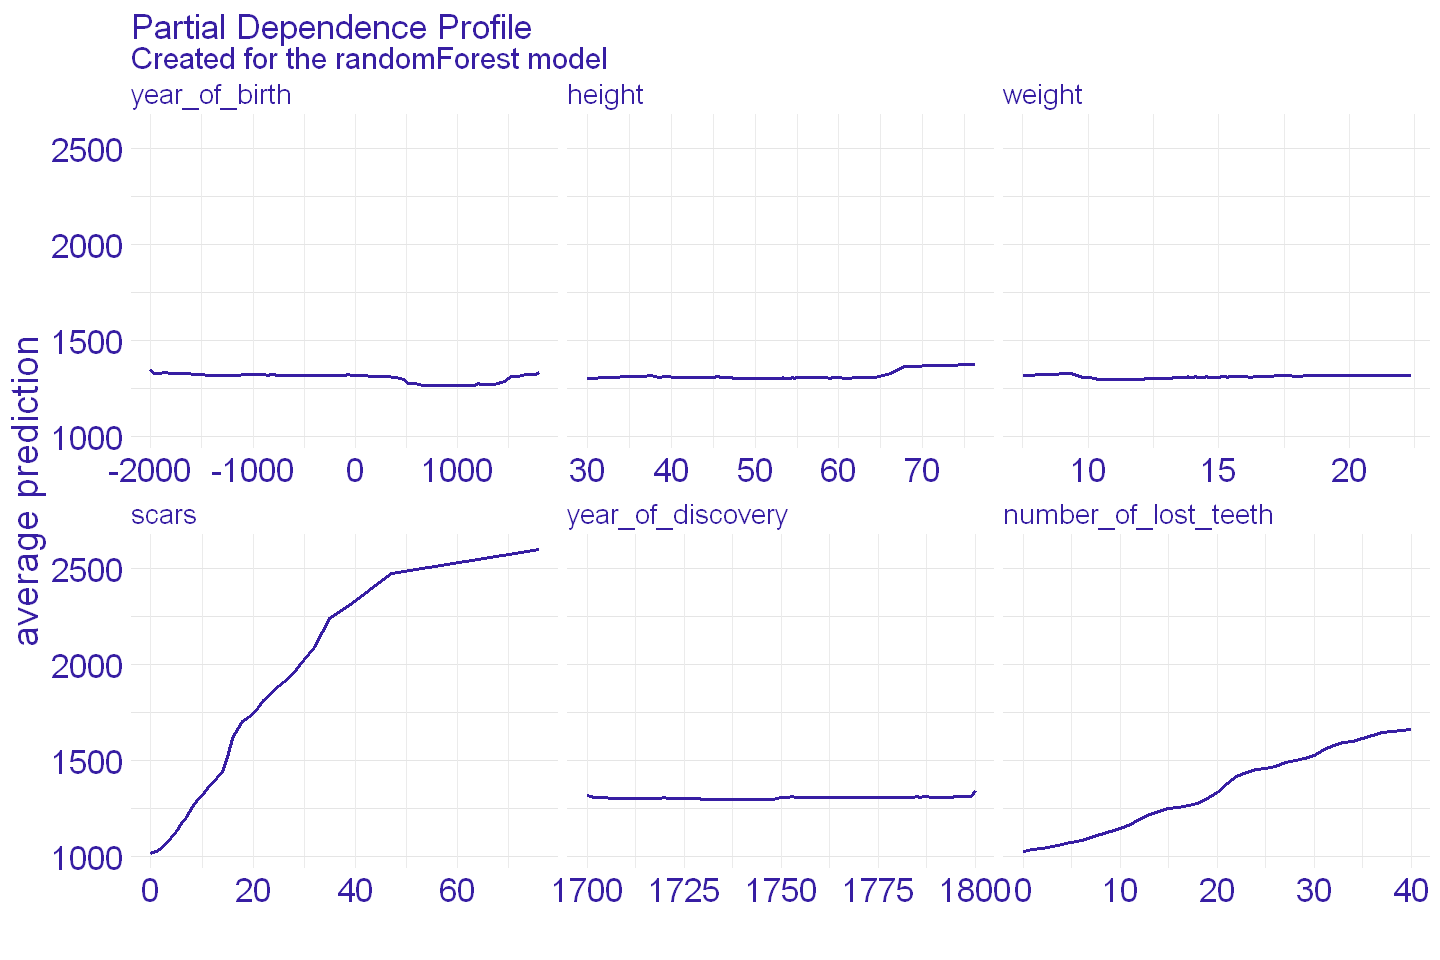

In [13]:
task2_p6 <- increase_plot_font_size(plot(model_profile(rf_explainer))) + ggtitle("Partial Dependence Profile")
task2_p6

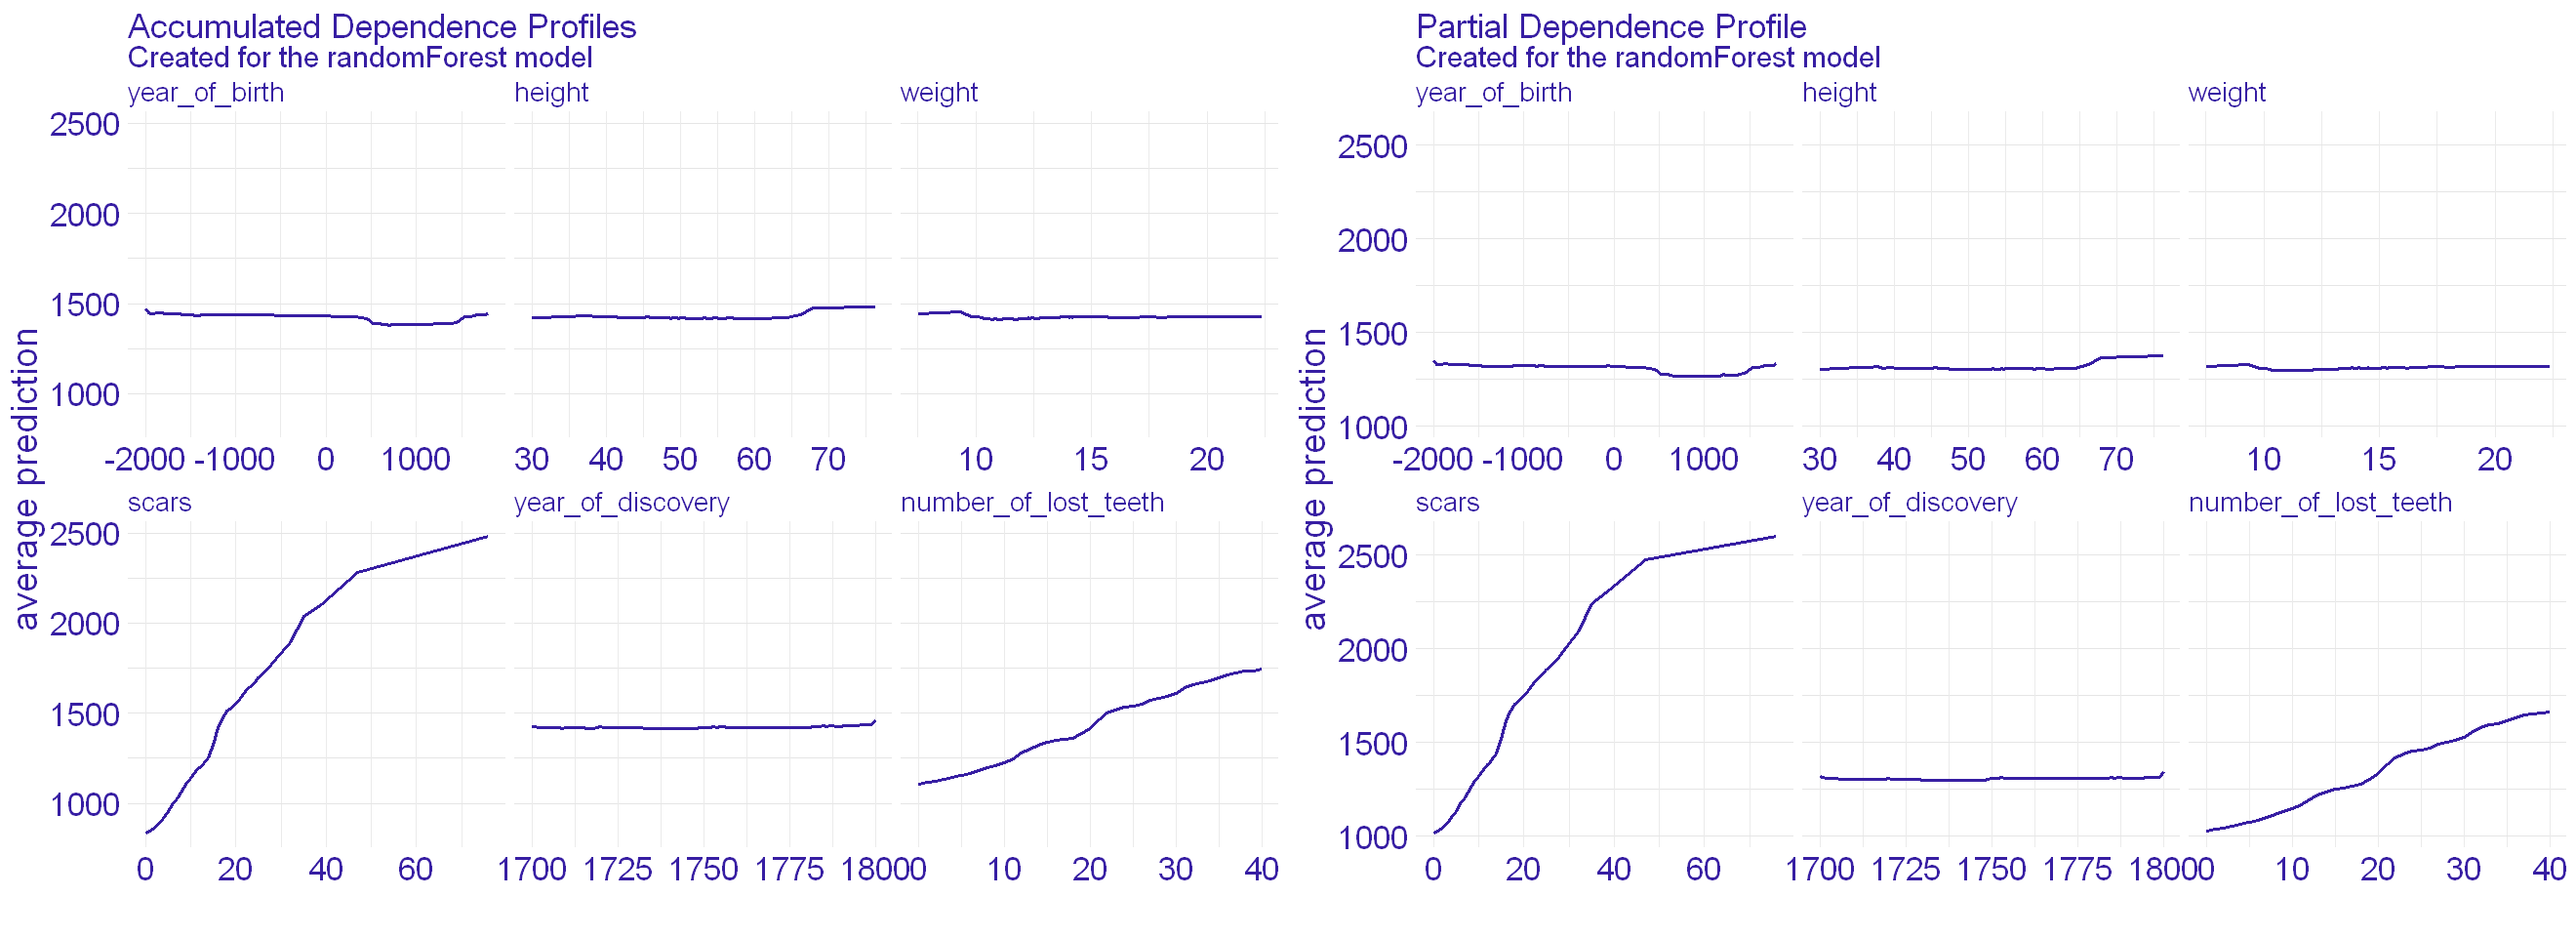

In [14]:
options(repr.plot.width = 22)

grid.arrange(task2_p5, task2_p6, ncol = 2)

### Task 3

In [15]:
lm_model <- lm(life_length ~ ., data = data)
lm_model


Call:
lm(formula = life_length ~ ., data = data)

Coefficients:
         (Intercept)         year_of_birth                height                weight                 scars  
           668.35356              -0.02369              -0.34193               1.02715              39.97634  
          colourblue           colourgreen             colourred     year_of_discovery  number_of_lost_teeth  
           -13.50052             -11.34721             -13.85137              -0.04760              20.14905  


In [16]:
lm_explainer <- explain(lm_model, data = X_train, y = y_train)

Preparation of a new explainer is initiated
  -> model label       :  lm  (  default  )
  -> data              :  2000  rows  7  cols 
  -> target variable   :  2000  values 
  -> model_info        :  package stats , ver. 3.6.3 , task regression (  default  ) 
  -> predict function  :  yhat.lm  will be used (  default  )
  -> predicted values  :  numerical, min =  540.9447 , mean =  1370.986 , max =  3925.691  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -108.2062 , mean =  -3.701928e-12 , max =  113.8603  
  A new explainer has been created!  


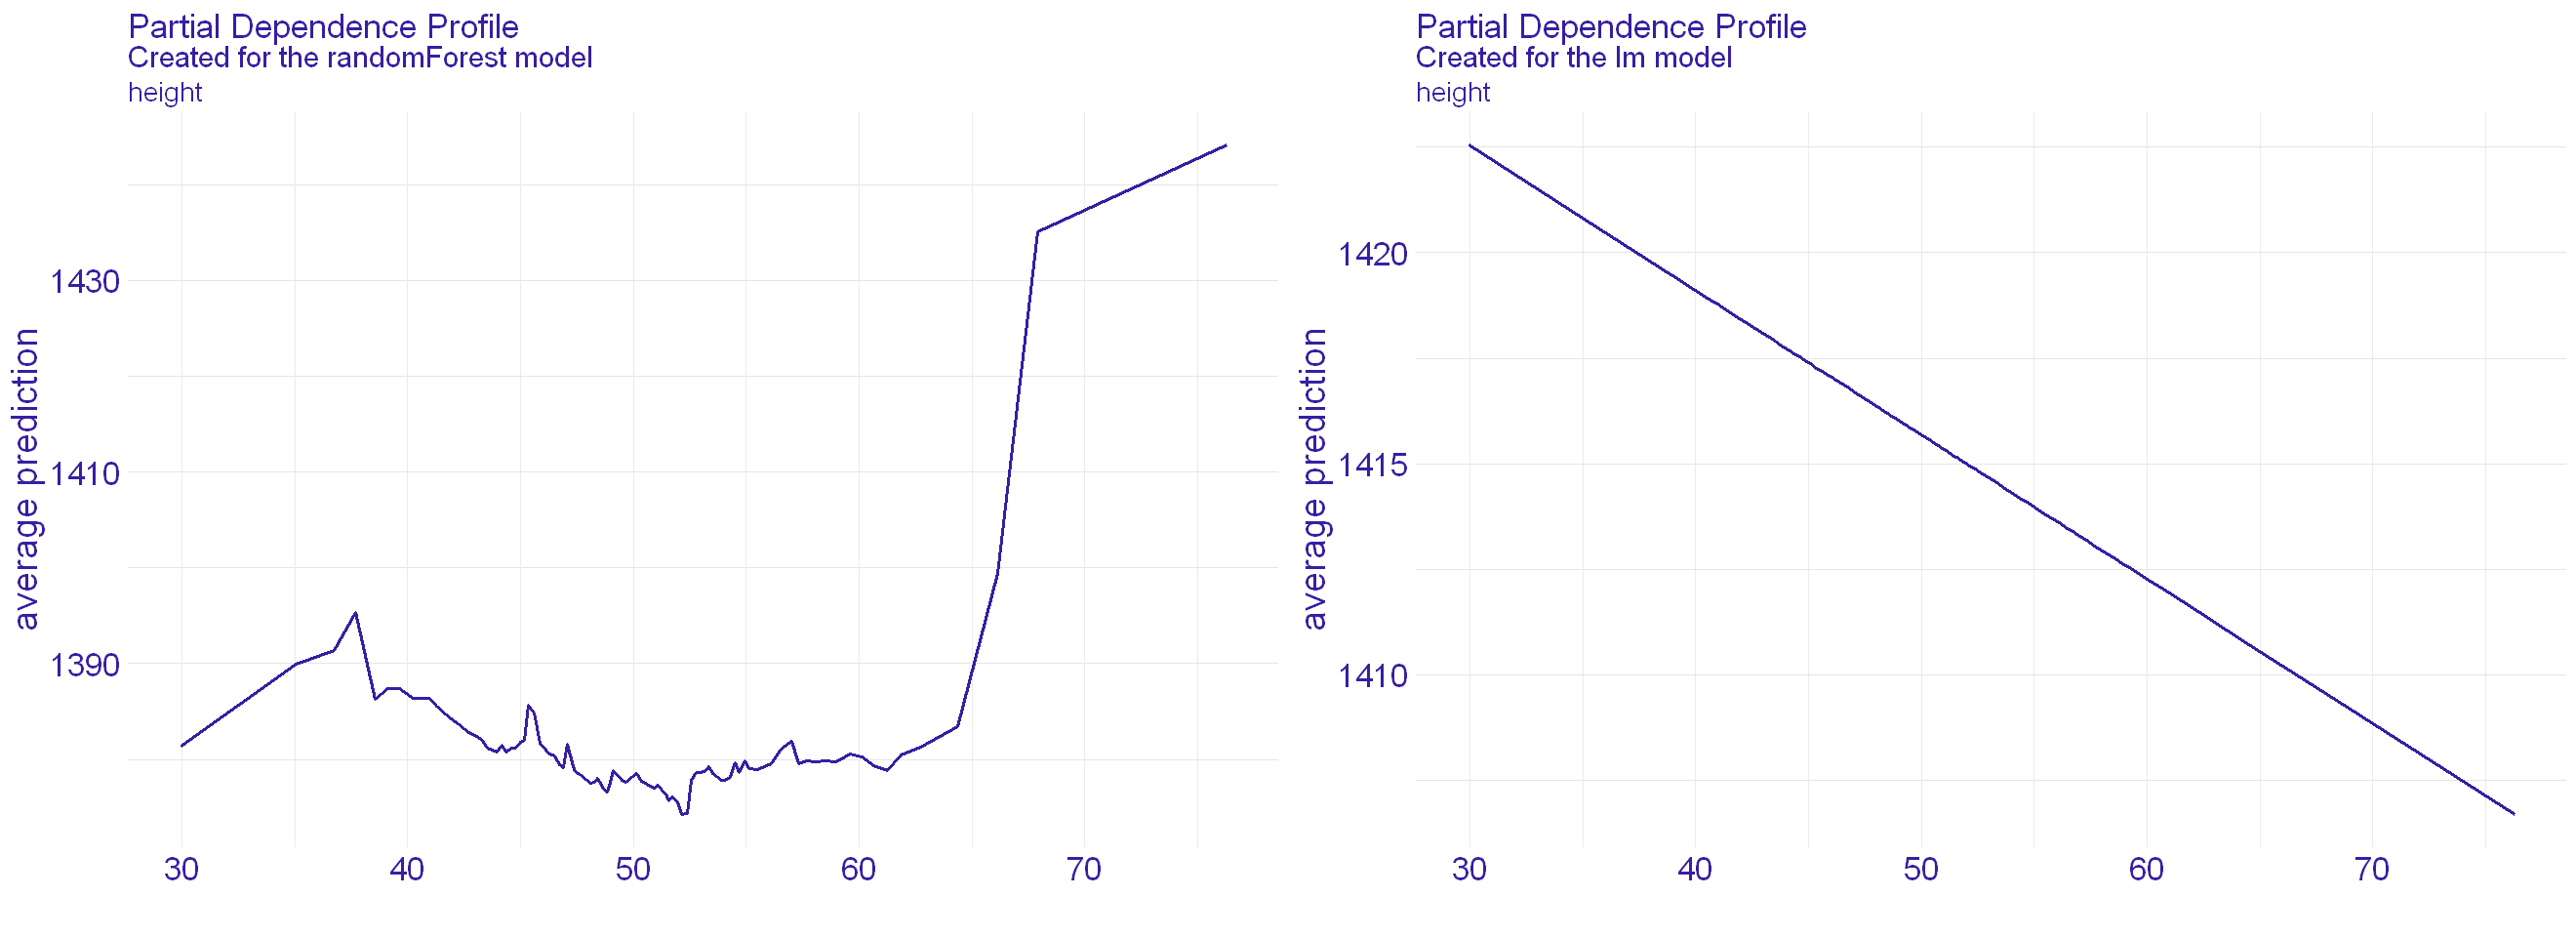

In [17]:
task3_rf_pdp <- model_profile(rf_explainer, "height")
task3_rf_p1 <- increase_plot_font_size(plot(task3_rf_pdp)) +
    ggtitle("Partial Dependence Profile")

task3_lm_pdp <- model_profile(lm_explainer, "height")
task3_lm_p1 <- increase_plot_font_size(plot(task3_lm_pdp)) +
    ggtitle("Partial Dependence Profile")

options(repr.plot.width = 22, repr.plot.height = 8)
grid.arrange(task3_rf_p1, task3_lm_p1, ncol = 2)

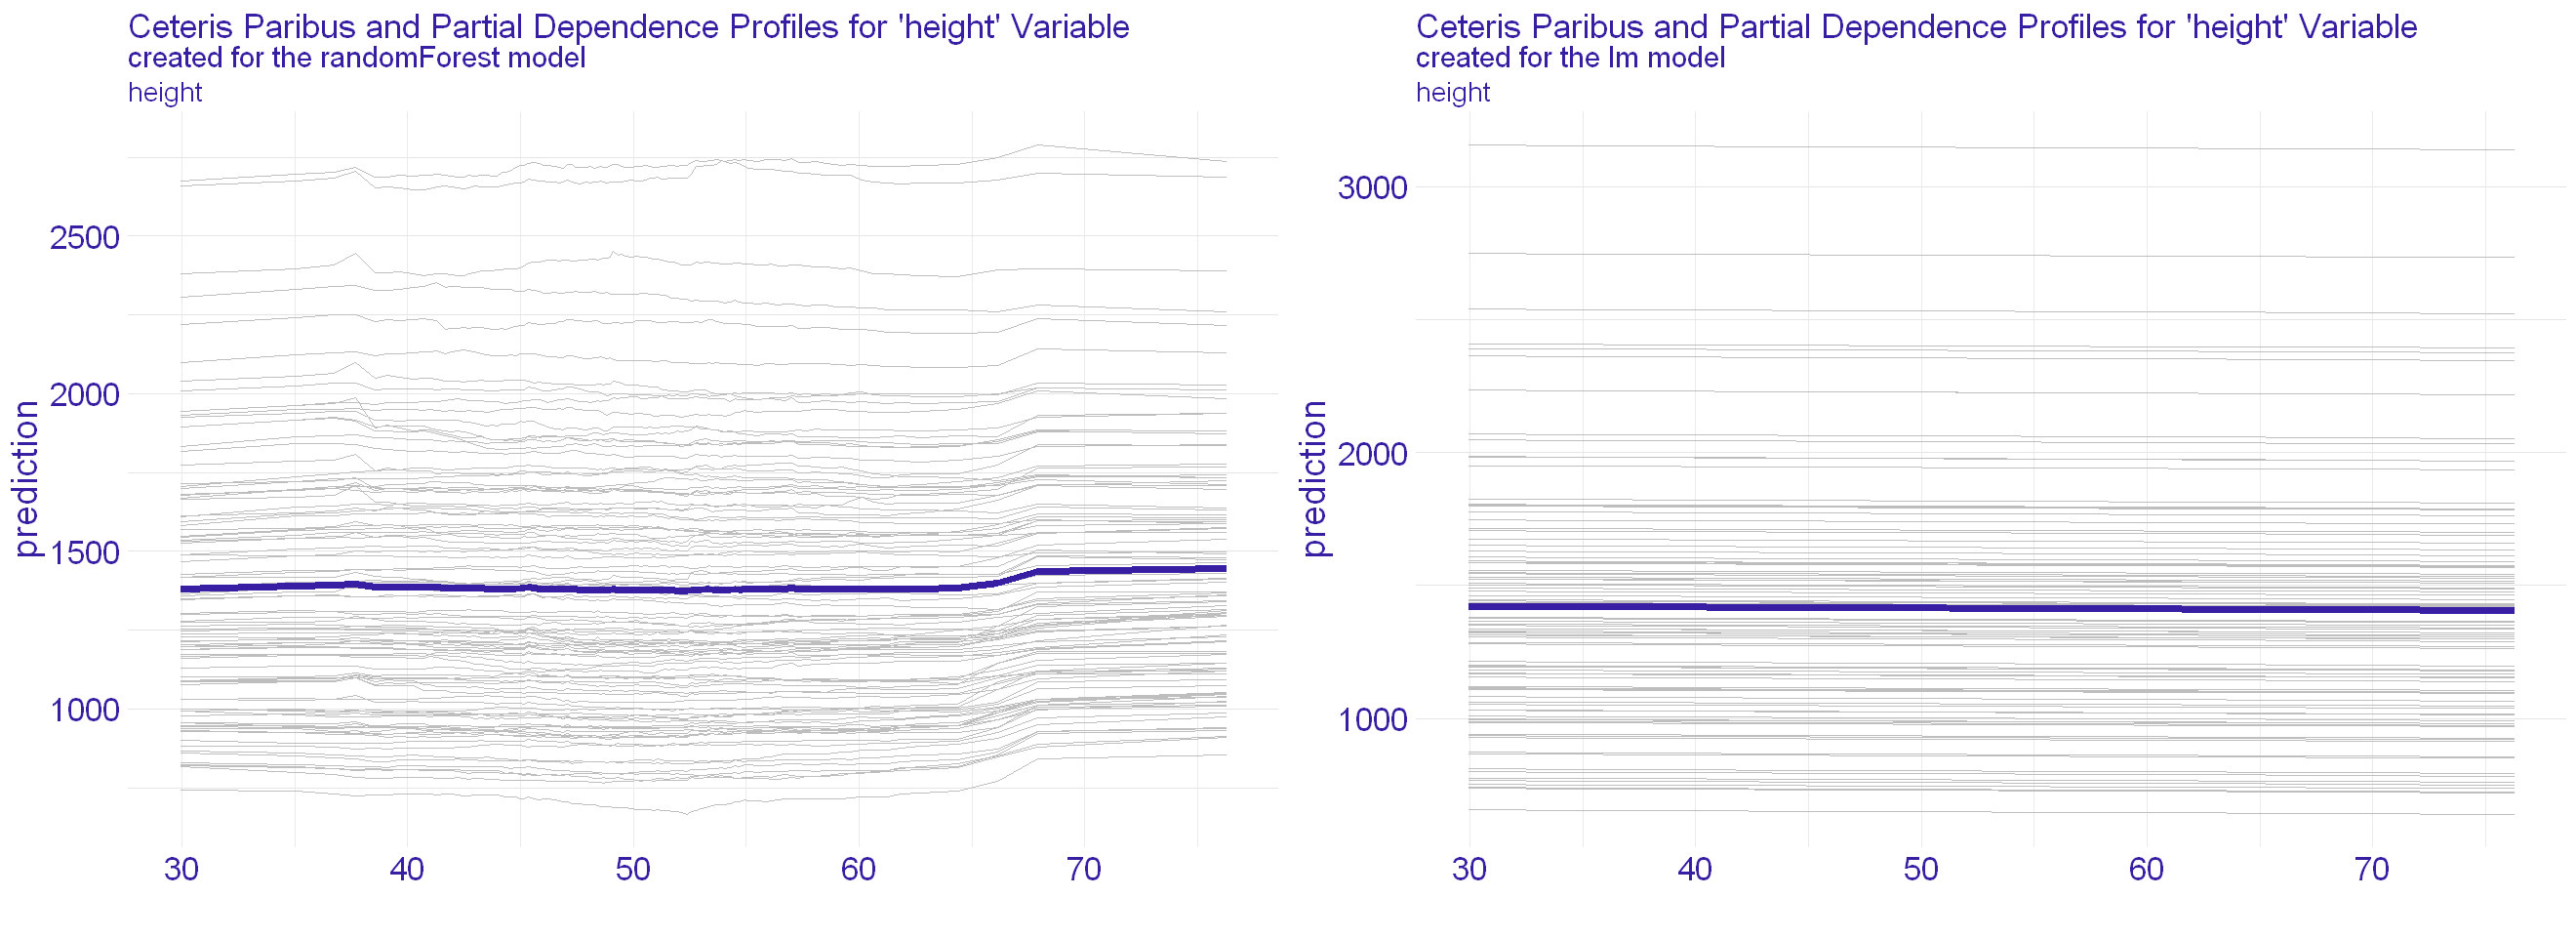

In [18]:
task3_rf_p2 <- increase_plot_font_size(plot(task3_rf_pdp, geom = "profiles")) +
    theme(plot.subtitle = element_text(margin = margin(0, 0, 5, 0))) +
    ggtitle("Ceteris Paribus and Partial Dependence Profiles for 'height' Variable")

task3_lm_p2 <- increase_plot_font_size(plot(task3_lm_pdp, geom = "profiles")) +
    theme(plot.subtitle = element_text(margin = margin(0, 0, 5, 0))) +
    ggtitle("Ceteris Paribus and Partial Dependence Profiles for 'height' Variable")

options(repr.plot.width = 22, repr.plot.height = 8)
grid.arrange(task3_rf_p2, task3_lm_p2, ncol = 2)

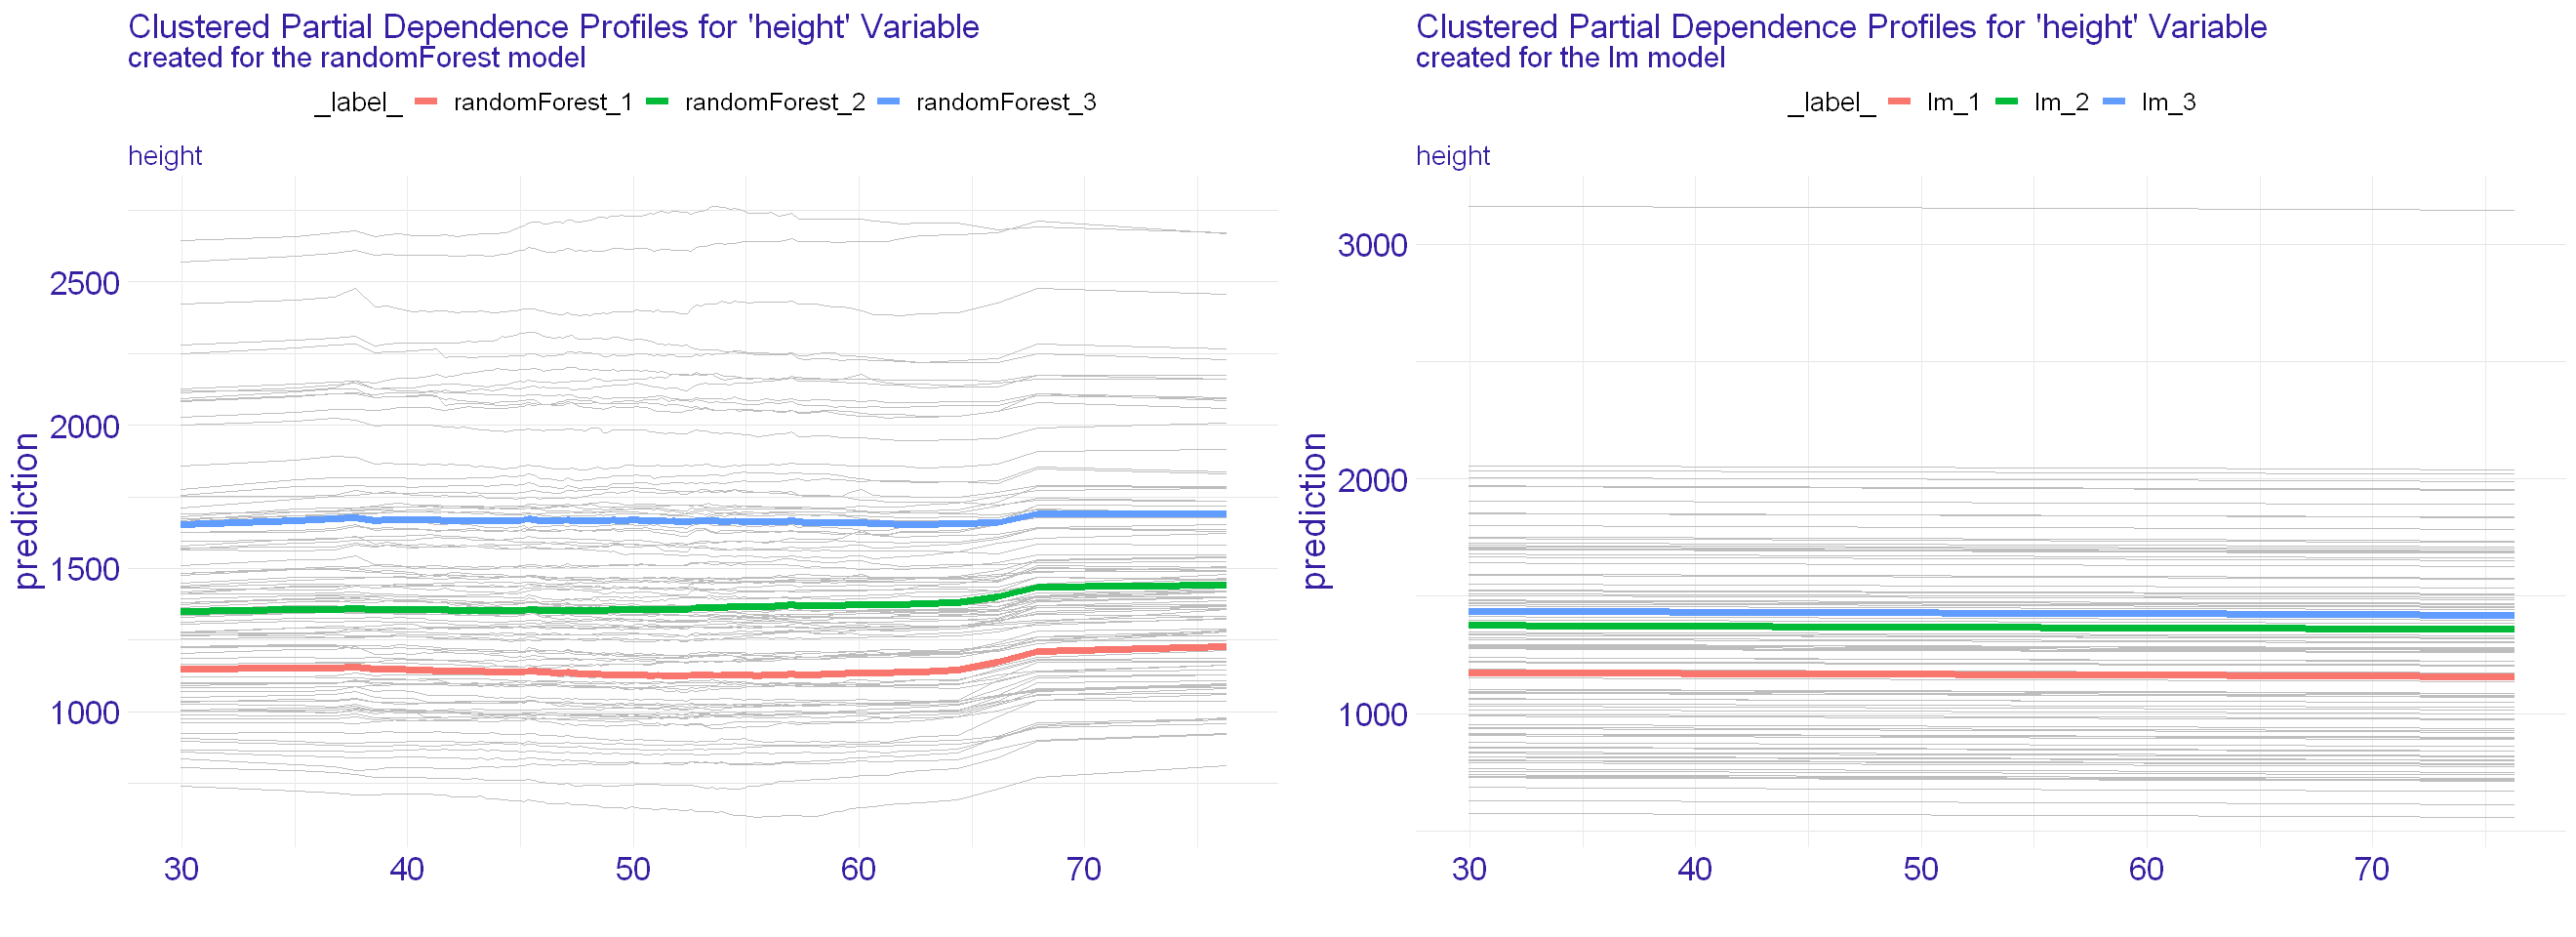

In [19]:
task3_rf_p3 <- increase_plot_font_size(
    plot(
        model_profile(rf_explainer, "height", k = 3),
        geom="profiles"
    )
) +
    theme(plot.subtitle = element_text(margin = margin(0, 0, 5, 0))) +
    ggtitle("Clustered Partial Dependence Profiles for 'height' Variable")

task3_lm_p3 <- increase_plot_font_size(
    plot(
        model_profile(lm_explainer, "height", k = 3),
        geom="profiles"
    )
) +
    theme(plot.subtitle = element_text(margin = margin(0, 0, 5, 0))) +
    ggtitle("Clustered Partial Dependence Profiles for 'height' Variable")

options(repr.plot.width = 22, repr.plot.height = 8)
grid.arrange(task3_rf_p3, task3_lm_p3, ncol = 2)